In [2]:
#pip install seaborn
#pip install plotpy

In [10]:
import pandas as pd
import numpy as np
import os

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
path = './dataset/'
print(os.listdir(path))

['field-4.csv', 'field-1.csv', 'field-20.csv', 'field-16.csv', 'field-18.csv', 'test.csv', 'field-24.csv', 'field-7.csv', 'field-26.csv', 'field-6.csv', 'train.csv', 'field-11.csv', 'field-10.csv', 'field-25.csv', 'field-22.csv', 'field-23.csv', 'field-3.csv', 'field-0.csv', 'field-14.csv', 'sample-submission.csv', 'field-21.csv', 'field-2.csv', 'field-5.csv', 'field-15.csv', 'soil_data.csv', 'field-12.csv', 'field-27.csv', 'field-9.csv', 'field-13.csv', 'field-8.csv', 'field-17.csv', 'field-19.csv']


In [3]:
ds_train = pd.read_csv(path+'train.csv')
ds_test = pd.read_csv(path+'test.csv')
ds_all = pd.concat([ds_train, ds_test])

print(ds_train.shape, ds_test.shape, ds_all.shape)
ds_all.head()

(5243, 7) (4110, 6) (9353, 7)


,Id,field,age,type,harvest_year,harvest_month,production
0,0,0,19,5,2004,1,0.064071
1,1,0,19,5,2004,2,0.047658
2,2,0,19,5,2004,3,0.016866
3,3,0,19,5,2004,4,0.025525
4,4,0,19,5,2004,5,0.047690


In [7]:
def to_date(ds):
    return pd.to_datetime((ds.harvest_year*10000+ds.harvest_month*100+1)\
                                  .apply(str),format='%Y%m%d') 
for d in [ds_train, ds_test, ds_all]:
    d['date'] = to_date(d)


<Axes: xlabel='production', ylabel='Density'>

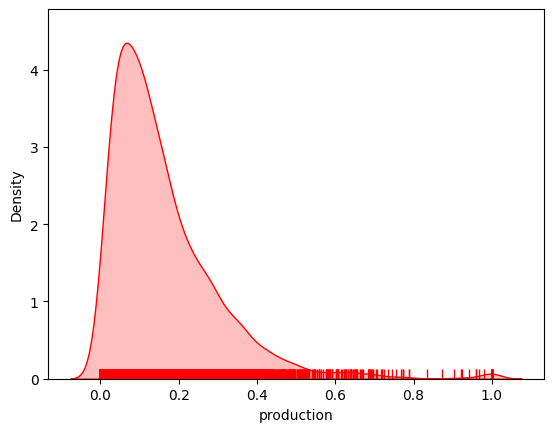

In [11]:
sns.distplot(ds_all.production, hist=False, color="r", rug=True, kde_kws={"shade": True})

In [12]:
print("Mean: ", ds_all.production.mean())

Mean:  0.16145932341328453


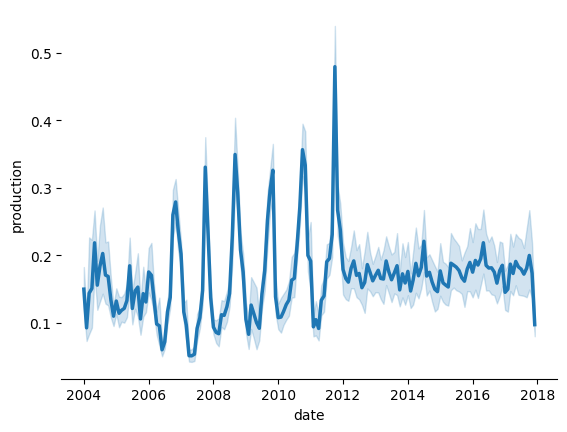

In [23]:
ax = plt.subplot(autoscale_on= True)
sns.lineplot(x='date', y='production', data=ds_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)

In [24]:
ds_all.shape

(9353, 8)

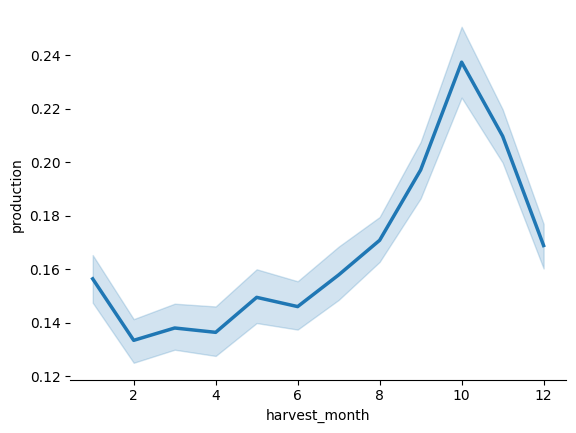

In [25]:
ax = plt.subplot(autoscale_on= True)
sns.lineplot(x='harvest_month', y='production', data=ds_all, palette="tab10", linewidth=2.5)

sns.despine(left=True)